# Genome assembly project

In [1]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

In [2]:
genome = pd.read_csv('/home/nikita/Documents/work/git_projects/GenomeAssembly/data/text.txt', sep = '\n')

In [3]:
def give_character_content_1(genome, alphabet):
    content = {'S':0, 'T':0, 'O':0, 'I':0, 'B':0, 'N':0}
    for index, read in genome.iterrows():
        read = read.values[0]
        for latter in alphabet:
            tmp = read.count(latter)/len(read)
            content[latter] += tmp
    content = {key:round(value/20087, 3) for key, value in content.items()}
    return content

In [4]:
def give_character_content_2(genome, alphabet):
    freq = {'S':0, 'T':0, 'O':0, 'I':0, 'B':0, 'N':0}
    content = str()
    for index, read in genome.iterrows():
        read = read.values[0]
        content += read
    for latter in alphabet:
        value = content.count(latter)/len(content)
        freq[latter] = value
    return freq
    

In [5]:
# S = B
# N = I
# T = O (repeats)

def reverse_compliment(string):
    charg = {'S':'B', 'N':'I', 'T':'O',
             'B':'S', 'I':'N', 'O':'T'}
    rev_compl = ''.join(reversed(list(map(lambda latter: charg[latter], string))))
    return rev_compl
    
reverse_compliment('SNT')

'OIB'

In [6]:
def find_rev_compl(genome):
    result = list()
    content = str()
    for index, read in genome.iterrows():
        content += read.values[0]
    for index, read in genome.iterrows():
        read = reverse_compliment(read.values[0][50:-50])
        if content.find(read) != -1:
            print(content.find(read))
        


In [7]:
print('Alphabet is the following: ' + str(set(genome.loc[4].values[0].strip())))

Alphabet is the following: {'T', 'S', 'O', 'B', 'I', 'N'}


In [8]:
alphabet = {'S', 'T', 'O', 'I', 'B', 'N'}
n = 20087

In [9]:
print(give_character_content_1(genome, alphabet)) 
print(give_character_content_2(genome, alphabet))
# S = B
# N = I
# T = O (repeats)

{'S': 0.163, 'T': 0.178, 'O': 0.156, 'I': 0.17, 'B': 0.163, 'N': 0.169}
{'S': 0.1633294920289853, 'T': 0.1781902478281364, 'O': 0.15637730958305396, 'I': 0.16984501176144617, 'B': 0.163297062355151, 'N': 0.16896087644322716}


In [10]:
sizes = [len(read.values[0].strip()) for index, read in genome.iterrows()]
summary = {'Min':min(sizes), 'Max':max(sizes), 'number of reads':len(sizes), 'length':sum(sizes)}
print(summary)

{'Min': 110, 'Max': 200, 'number of reads': 20087, 'length': 3515299}


In [11]:
print(sum(sizes)/len(sizes))

175.00368397471001


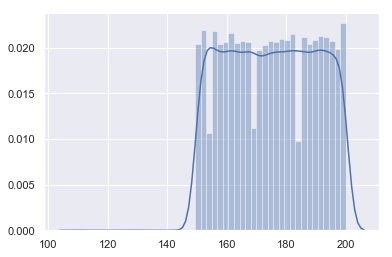

In [12]:
sns.distplot(sizes)

### Question:
1) Are they pair-end reads or not?

2) What is average Chargaff rule bias?

1.5%

3) If we chose k=9, then we in most of the cases will have only two variants... interesting.

3) de Brujn

In [13]:
# coding: utf-8

# In[2]:

def debruijnize(reads):
    nodes = set()
    not_starts = set()
    edges = []
    for r in reads:
        r1 = r[:-1]
        r2 = r[1:]
        nodes.add(r1)
        nodes.add(r2)
        edges.append((r1,r2))
        not_starts.add(r2)
    return (nodes,edges,list(nodes-not_starts))

# In[3]:

def build_k_mer(str,k):
    return [str[i:k+i] for i in range(0,len(str)-k+1)]

# In[4]:

# reads = build_k_mer("ATCGTTGCGCGACCG",4)
# print(reads)

# In[5]:

G = debruijnize(reads)
print(G)

# In[6]:

def make_node_edge_map(edges):
    node_edge_map = {}
    for e in edges:
        n = e[0]
        if n in node_edge_map:
            node_edge_map[n].append(e[1])
        else:
            node_edge_map[n] = [e[1]]
    return node_edge_map

m = make_node_edge_map(G[1])
print(m)

# In[8]:


def assemble_trail(trail):
    if len(trail) == 0:
        return ""
    result = trail[0][:-1]
    for node in trail:
        result += node[-1]
    return result

assemble_trail(t)

# In[12]:

def test_assembly_debruijn(t,k):
    reads = build_k_mer(t,k)
    G = debruijnize(reads)
    v = visualize_debruijn(G)
    nemap = make_node_edge_map(G[1])
    #print(G)
    #print(v)
    start = next(iter(G[2])) if (len(G[2]) > 0) else next(iter(G[0]))
    trail = eulerian_trail(nemap,start)
    return assemble_trail(trail)

NameError: name 'reads' is not defined

# Assembled

In [18]:
import pandas as pd
import re

In [19]:
# Тут у нас хранятся три хромосомы/генома/сборки
# Наверное, следует их анализировать по отдельности

all_genomes = list()

with open('/home/nikita/Documents/work/git_projects/GenomeAssembly/data/assembled.txt', 'r') as assemble:
    for genome in assemble:
        all_genomes.append(genome)
        

In [20]:
len(all_genomes) # Всего у нас шесть строк в списке

6

In [73]:
# Вероятно, это прясая и обратная цепь
print(len(all_genomes[0]))
print(len(all_genomes[1]))
print(len(all_genomes[2]))
print(len(all_genomes[3]))
print(len(all_genomes[4]))
print(len(all_genomes[5]))

300454
300454
402937
402937
300001
300000


In [21]:
# Посмотрим на частоту нуклеотидов на разных цепях
def give_character_content_str(genome):
    freq = {'S':0, 'T':0, 'O':0, 'I':0, 'B':0, 'N':0}
    for latter in alphabet:
        value = genome.count(latter)/len(genome)
        freq[latter] = value
    return freq

print(give_character_content_str(all_genomes[0]))
print(give_character_content_str(all_genomes[1]))
print(give_character_content_str(all_genomes[2]))
print(give_character_content_str(all_genomes[3]))
print(give_character_content_str(all_genomes[4]))
print(give_character_content_str(all_genomes[5]))

{'S': 0.15469922184427568, 'T': 0.17780425622557863, 'O': 0.15239604065847018, 'I': 0.1611028643319776, 'B': 0.17614676456296138, 'N': 0.17784752408022525}
{'S': 0.17614676456296138, 'T': 0.17784752408022525, 'O': 0.15239604065847018, 'I': 0.17780425622557863, 'B': 0.15469922184427568, 'N': 0.1611028643319776}
{'S': 0.14659611800355887, 'T': 0.18206816450214303, 'O': 0.16082663046580484, 'I': 0.1640901679418867, 'B': 0.16884029016943095, 'N': 0.1775761471396273}
{'S': 0.16884029016943095, 'T': 0.1775761471396273, 'O': 0.16082663046580484, 'I': 0.18206816450214303, 'B': 0.14659611800355887, 'N': 0.1640901679418867}
{'S': 0.16001279995733347, 'T': 0.1764327452241826, 'O': 0.15459281802393993, 'I': 0.15491615027949907, 'B': 0.17749274169086102, 'N': 0.17654941150196166}
{'S': 0.17749333333333334, 'T': 0.17655, 'O': 0.15459333333333333, 'I': 0.17643333333333333, 'B': 0.16001333333333334, 'N': 0.15491666666666667}


In [22]:
# Генерит к-меры из строки
# Нужна для поиска мотивов + по к-мерам будем выявлять комплиментарность
def build_k_mer(str,k):
    return [str[i:k+i] for i in range(0,len(str)-k+1)]

## Genome 1

### Forward 

In [354]:
# Все к-меры в геноме с окном = 5

k_mers = build_k_mer(all_genomes[1], 5)

In [355]:
# Почему k=5?
# Чтобы ответить на этот вопрос, построим графичек, где k=3...10
# И где наибольшие различия между первым и вторым
# Но нужно нормализовать, ибо более короткие будут возникать чаще

In [384]:
kmers_comparison = list()

for k in range(3, 11):
    k_mers = build_k_mer(all_genomes[5], k)
    distr = dict()
    for k_mer in k_mers:
        if k_mer not in distr:
            distr[k_mer] = 1
        else:
            distr[k_mer] += 1
    listofTuples = sorted(distr.items(), key=lambda x: x[1])
    s = sum([x[1] for x in listofTuples[-40:-1]])
    kmers_comparison.append((k, listofTuples[-1][1]/s))
    

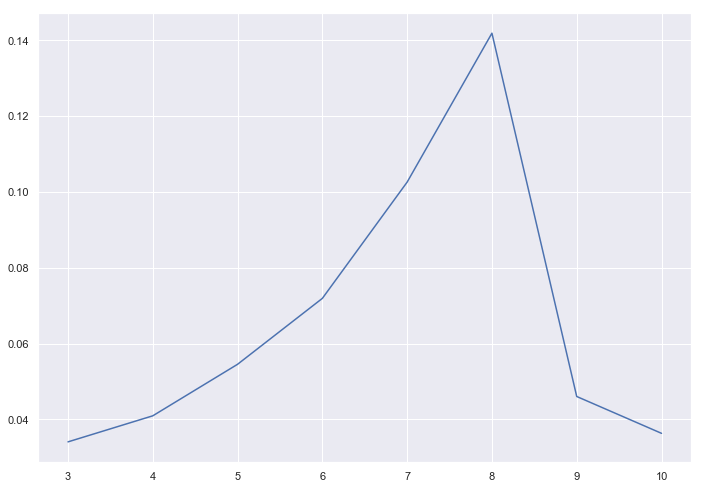

In [385]:
x = [i[0] for i in kmers_comparison]
y = [i[1] for i in kmers_comparison]
sns.lineplot(x=x, y=y)
# Поэтому 5-меры для данного генома наиболее информативны

In [359]:
# Вернемся к нашим баранам. Мы определились с окном. к = 5
k_mers = build_k_mer(all_genomes[1], 5)
distr = dict()
for k_mer in k_mers:
    if k_mer not in distr:
        distr[k_mer] = 1
    else:
        distr[k_mer] += 1

In [360]:
# Сортируем по количеству вхождений
listofTuples = sorted(distr.items(), key=lambda x: x[1])

In [361]:
# Now, lets calculate p_value and figure out how many motifs do we have

# Calculate pval for each kmer in list
distr_values = list(map(lambda x: x[1], listofTuples))
p_val_distr = list()
for i in distr_values:
    new_list = list(map(lambda x: x if x >= i else 'nan', distr_values))
    p_val = len([x for x in new_list if str(x) != 'nan'])/len(distr_values)
    p_val_distr.append(p_val)

In [363]:
# Now lets see how many kmers a lower than 0.05
p_val_distr[-40:-1]
# Approximately 37-40

[0.005271955767005272,
 0.0050147871930050145,
 0.0050147871930050145,
 0.004757618619004758,
 0.004757618619004758,
 0.004757618619004758,
 0.004371865758004372,
 0.004243281471004243,
 0.0041146971840041145,
 0.0041146971840041145,
 0.0038575286100038576,
 0.003728944323003729,
 0.0036003600360036,
 0.0036003600360036,
 0.0036003600360036,
 0.0032146071750032146,
 0.003086022888003086,
 0.003086022888003086,
 0.002828854314002829,
 0.0027002700270027003,
 0.0025716857400025716,
 0.0025716857400025716,
 0.0023145171660023146,
 0.0023145171660023146,
 0.0020573485920020573,
 0.0019287643050019288,
 0.0019287643050019288,
 0.0016715957310016716,
 0.001543011444001543,
 0.0014144271570014145,
 0.0012858428700012858,
 0.0011572585830011573,
 0.0010286742960010286,
 0.0009000900090009,
 0.0007715057220007715,
 0.0006429214350006429,
 0.0005143371480005143,
 0.00038575286100038574,
 0.00025716857400025716]

In [364]:
# Т.е. около сорока к-меров потенциально неслучайно собрались.
# Вот они:
listofTuples[-37:-1]

[('TBOOI', 88),
 ('OONNN', 88),
 ('NNBNB', 88),
 ('TNTSB', 89),
 ('NBNNN', 90),
 ('IITBO', 91),
 ('IITST', 91),
 ('ONTNT', 93),
 ('NNNBN', 94),
 ('OIIIO', 95),
 ('IIISI', 95),
 ('BNNNN', 95),
 ('OIIIN', 96),
 ('NNNNN', 99),
 ('BNOII', 99),
 ('TITBO', 102),
 ('IIITS', 106),
 ('BNTNT', 108),
 ('OIIIB', 108),
 ('INOII', 112),
 ('INTNT', 112),
 ('SNOII', 113),
 ('OIIII', 115),
 ('TNTSN', 115),
 ('TNOII', 116),
 ('NNTNT', 121),
 ('TNTNT', 126),
 ('SNTNT', 128),
 ('OIIIS', 129),
 ('TNTSS', 139),
 ('TNTST', 140),
 ('OIIIT', 149),
 ('TNTSI', 151),
 ('BIOII', 194),
 ('ITBOO', 269),
 ('NOIII', 451)]

In [249]:
# При этом они не то чтобы очень перекрываются
# А если исходя из частоты возникновения н/д. посмотреть кто из перечисленных имеет наименьшую вероятность собраться
# с имеющимся набором нд-ов
# {'S': 0.15469922184427568, 
# 'T': 0.17780425622557863, 
# 'O': 0.15239604065847018, 
# 'I': 0.1611028643319776, 
# 'B': 0.17614676456296138, 
# 'N': 0.17784752408022525}

In [256]:
# Для каждого из 37-ми мотивов смотрим, какова вероятность собраться таким составом
# Возможно, нам это что-то скажет

from functools import reduce
distr_kmers = [i[0] for i in listofTuples[-37:-1]]
freq = {'S': 0.15469922184427568, 'T': 0.17780425622557863, 'O': 0.15239604065847018, 'I': 0.1611028643319776, 'B': 0.17614676456296138, 'N': 0.17784752408022525}
result = list()
for i in distr_kmers:
    res_freq = list()
    for j in i:
        res_freq.append(float(freq[j]))
    multiply = reduce(lambda x, y: x*y, res_freq)
    result.append((i, multiply))
    

In [257]:
result.sort(key=lambda tup:tup[1])

In [270]:
len(all_genomes[0]) * 0.0001136123317424768

34.13527952135412

In [271]:
len(all_genomes[0]) * 0.00013800772738187435

41.46497372279367

In [258]:
result

[('IIIOO', 9.710847946399747e-05),
 ('SISII', 0.00010006588585499018),
 ('IIISI', 0.00010420802794588949),
 ('IIIIS', 0.00010420802794588949),
 ('ISIII', 0.0001042080279458895),
 ('IIIII', 0.00010852163047962208),
 ('OOSNT', 0.0001136123317424768),
 ('TOOSN', 0.00011361233174247681),
 ('TTOIS', 0.0001200741112034278),
 ('NINIO', 0.00012510534214676386),
 ('NINIS', 0.0001269960754560493),
 ('OTTTO', 0.00013054908316174825),
 ('NINII', 0.00013225296980151914),
 ('STTTO', 0.00013252208843710274),
 ('TTOTS', 0.00013252208843710274),
 ('OSNTT', 0.0001325543370827858),
 ('OSNTN', 0.00013258659357602969),
 ('TTOIB', 0.0001367212190475519),
 ('ITTTO', 0.00013800772738187435),
 ('TTOIT', 0.00013800772738187435),
 ('TTTOI', 0.00013800772738187435),
 ('TTOIN', 0.0001380413109327703),
 ('SBNIN', 0.0001388550594462431),
 ('NINIB', 0.00014460284633037763),
 ('IBNIN', 0.00014460284633037766),
 ('NINIT', 0.00014596351856740675),
 ('NININ', 0.00014599903812379504),
 ('BTTTO', 0.00015089498727291785),
 

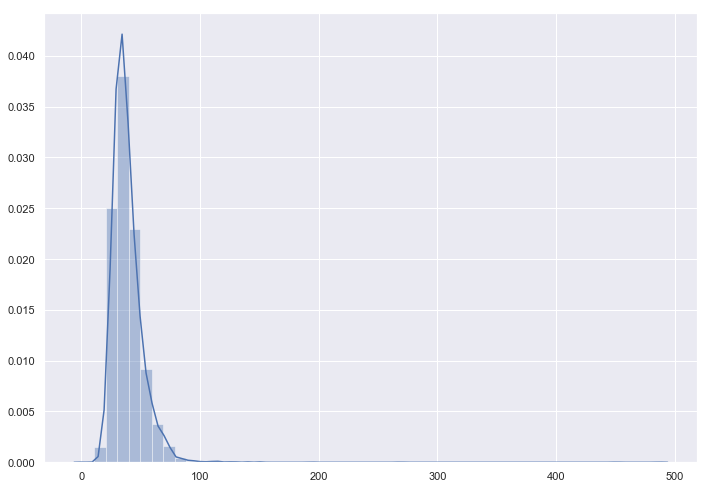

In [365]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(distr_values)

In [27]:
# Теперь, давайте сосредоточимся только на этих двух к-мерах:
# 'OOSNT', 269
# 'TTTOI', 451

In [ ]:
# Что мы можем сделать с этими мотивами?
# 1) Посторить Consensus sequence
# 2) Посмотреть окружение
# 3) Можно попытаться скластеризовать к-меры. Хз, как.

In [302]:
# Строим pLogo plot, но в виде barplot-а
pattern = '[STOBIN][STOBIN]TTTOI[STOBIN][STOBIN]'
maps = re.findall(pattern, all_genomes[0])
freq = {
    '0':{'S':0,'T':0,'O':0,'B':0,'I':0,'N':0},
    '1':{'S':0,'T':0,'O':0,'B':0,'I':0,'N':0},
    '-2':{'S':0,'T':0,'O':0,'B':0,'I':0,'N':0},
    '-1':{'S':0,'T':0,'O':0,'B':0,'I':0,'N':0},
}

In [303]:
for kmer in maps:
    for i in (0,1,-2,-1):
        freq[str(i)][kmer[i]] += 1

In [304]:
freq

{'0': {'S': 68, 'T': 88, 'O': 71, 'B': 78, 'I': 58, 'N': 88},
 '1': {'S': 68, 'T': 70, 'O': 64, 'B': 78, 'I': 70, 'N': 101},
 '-2': {'S': 74, 'T': 80, 'O': 54, 'B': 86, 'I': 62, 'N': 95},
 '-1': {'S': 78, 'T': 73, 'O': 59, 'B': 92, 'I': 66, 'N': 83}}

In [287]:
pd.DataFrame.from_dict(freq).to_csv('/home/nikita/Documents/work/git_projects/GenomeAssembly/first/TTTOI_df.tsv', sep='\t', index=0)

In [ ]:
# Можно посчитать частоту замен внутри мотива

In [ ]:
# Распределение по частоте вхождения мотива в геном

In [306]:
def motif_density(genome, step, motif):
    density = list()
    k = step
    try:
        for i in range(0,len(genome)+1,step):
            window = genome[i:k+1]
            n = len(re.findall(motif, window))
            if n != 0:
                density.append(len(re.findall(motif, window)))
            k += step
    except:
        return density
    return density

In [305]:
len(all_genomes[0])

300454

In [373]:
first = motif_density(all_genomes[1], 30100, 'NOIII')
motif_density(all_genomes[1], 30100, 'NOIII')

[4, 8, 2, 89, 98, 100, 93, 53, 3, 1]

In [374]:
second = motif_density(all_genomes[1], 30100, 'ITBOO')
motif_density(all_genomes[1], 30100, 'ITBOO')

[94, 97, 26, 3, 1, 5, 3, 3, 1, 36]

In [377]:
third = motif_density(all_genomes[1], 30100, 'BIOII')
motif_density(all_genomes[1], 30100, 'BIOII')

[91, 49, 1, 1, 2, 4, 2, 3, 3, 38]

In [336]:
y = [i for i in range(1,11)]

In [344]:
from collections import OrderedDict
df = OrderedDict([ ('window', y),
          ('first', first),
          ('second',  second),
          ('third', third)])

In [351]:
kmers_df = pd.DataFrame.from_dict(df)
kmers_df = pd.melt(kmers_df, id_vars=['window'],
                   value_vars=['first', 'second', 'third'],
                   var_name='Kmer_number',
                   value_name='Count')
kmers_df

,window,Kmer_number,Count
0,1,first,96
1,2,first,99
2,3,first,46
3,4,first,4
4,5,first,7
5,6,first,2
6,7,first,2
7,8,first,6
8,9,first,87
9,10,first,102


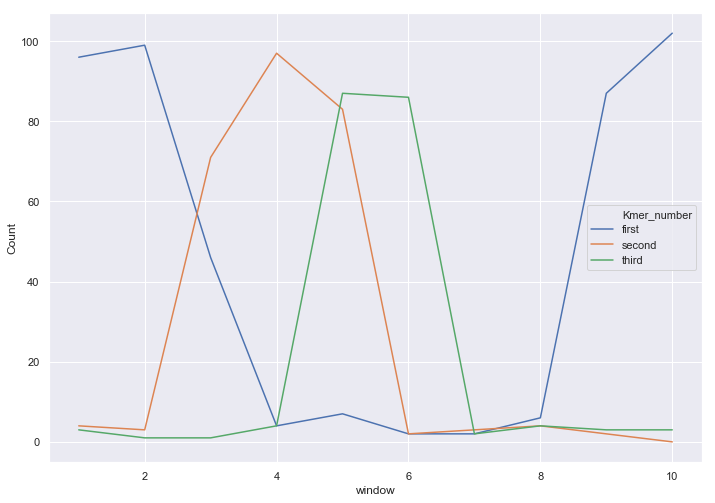

In [353]:
ax = sns.lineplot(x="window", y="Count", hue="Kmer_number", data=kmers_df)

In [ ]:
# Надо посмотреть на комплиментарной цепи и другие геномы